# Getting started 
I will assume that since this is open you at the very least have anaconda installed... and from this you will have some modules called numpy, matplotlib, and scipy, installed 
Now when you run any of the code lines bellow you will need to select a python enviroment to run it in the command

## Using a package
Even though these modules are installed they won't be inside your enviorment (the memory used for executing code)
To bring them into your enviroment you will need to import them
Lets start off by importing two of the most important modules and exploring what they can do for us.

In [52]:
%matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as c 
import scipy.special as s


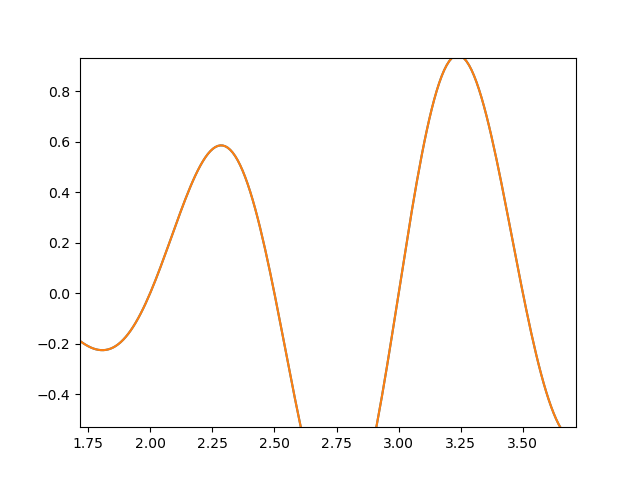

In [54]:
x = np.linspace(0,10,1000)
y = np.sin(np.pi*2*x/1)*np.exp(-(x-3)**2)
plt.plot(x,y)
plt.show()

The `as` command just gives the module an alias thats quicker to type. 
The precentage sign `%` is used to change notebook settings, in this case it forces the matplotlib package to operate in an interactive mode 
## Numpy 
or numerical python is a package that handles matrices and numerical calculations in python
The `linspace()` command is a function in numpy that jenerates a set of values linearly spaced from a minumum (0) to a maximum (10) in N steps(1000)
Other common functions are also included in numpy such as `sin()`, `cos()`, `exp()`
## matplotlib 
is a package that allows you to plot figures and handle generating videos 
The `plot` command will draw something on a new figure 
The `show` command just forces this figure to be drawn

## Example 1 
To get ourselves used to this lets start off by 
recreating some of the figures in Bruus's book...
#### Figure 1.1c (probability densities) for hydrogen atom

In [61]:
a0 = c.value('Bohr radius')
def a(k,l,n):
    ak = a0
    for beta in range(k):
        ak *= beta+l+1-n/((beta+1)*(k+2*l+2))
    
    return  ak 
def rho(r,n):
    return 2*r/(n*a0)
def coulomb_funct(r,n,l):
    R = 0
    print(n)
    rh=rho(r,n)
    for k in range(n-l-1):
        R += rh**l*a(k,l,n)*rh**k*np.exp(-rh/2)
    return R

4


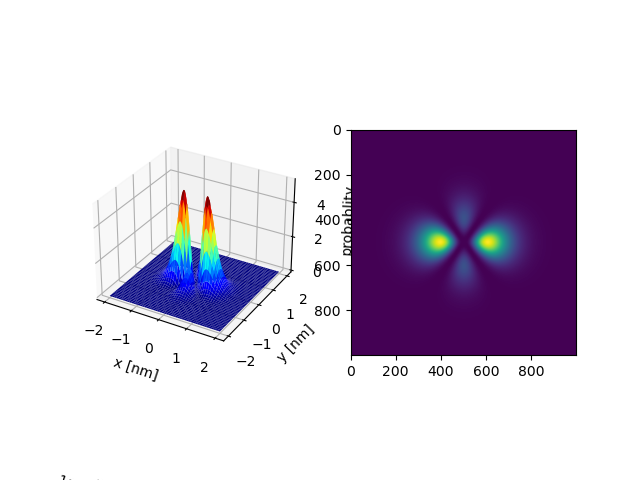

In [67]:
n = 4
l = 2
m = 0
#generate x y coordinate space 
x = np.linspace(-2e-9,2e-9,1000)
y = np.linspace(-2e-9,2e-9,1000)
#generate meshgrid overlay for that coordinate space 
X,Y = np.meshgrid(x,y)

#create 
fig =plt.figure()
ax1 = fig.add_subplot(1,2,1,projection = '3d')
ax2 = fig.add_subplot(1,2,2)
r= np.sqrt(X**2+Y**2)
th = 0*X*Y 
phi = np.nan_to_num(np.sign(Y)*np.arccos(X/r))
rphiHy = coulomb_funct(r,n,l)*s.sph_harm(m,l,th,phi)
prob = np.abs(rphiHy)**2
ax1.plot_surface(X,Y,prob,cmap='jet')
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('probablity')
ax2.imshow(prob)




In [23]:
phi

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.57080341, 1.5708034 , 1.57080338, ..., 1.57078927, 1.57078926,
        1.57078924],
       [1.5708034 , 1.57080339, 1.57080338, ..., 1.57078928, 1.57078926,
        1.57078925],
       [1.5708034 , 1.57080338, 1.57080337, ..., 1.57078928, 1.57078927,
        1.57078926]])